In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("UpdatedSurvey.csv")
df=df.drop(["Unnamed: 0"], axis=1)
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,anonymity,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comprehensive_care,comprehensive_support
0,3,1,0,0,1,1,3,0,1,2,...,1,1,1,2,1,0,2,0,7,5
1,3,0,0,0,0,2,4,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,2,0,0,0,0,2,3,0,1,0,...,1,1,2,2,2,2,1,0,3,4
3,1,0,0,1,1,1,2,0,1,1,...,2,2,1,0,0,0,1,1,5,4
4,1,0,0,0,0,0,1,1,1,0,...,1,1,1,2,2,2,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,0,0,0,0,1,0,2,0,1,0,...,1,1,1,1,1,1,0,0,3,4
1247,2,0,0,1,1,1,2,1,1,2,...,1,1,1,2,1,1,2,0,8,4
1248,2,0,0,1,1,3,4,0,1,0,...,2,2,0,0,1,1,1,0,8,4
1249,3,1,0,0,0,0,1,1,1,0,...,2,1,0,0,1,1,1,0,5,4


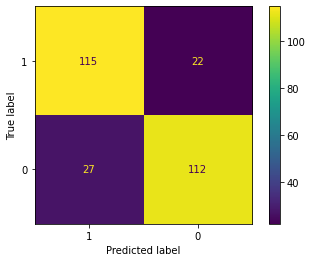

Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       137
           1       0.84      0.81      0.82       139

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276

Accuracy of Logistic Regression: 0.822463768115942


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=df.drop(columns=['treatment'])
X = scaler.fit_transform(X)
y= df['treatment']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.22, stratify=y, random_state=42)
modelL = LogisticRegression()
modelL.fit(X_train, y_train)
predictionL = modelL.predict(X_test)
cmL= metrics.confusion_matrix(y_test, predictionL)
cm_disL = metrics.ConfusionMatrixDisplay(confusion_matrix=cmL, display_labels=df['treatment'].unique())
cm_disL.plot()
plt.show()
classL= metrics.classification_report(y_test, predictionL)
print('Classification Report of Logistic Regression:\n', classL)
scoreL= metrics.accuracy_score(y_test, predictionL)
print('Accuracy of Logistic Regression:', scoreL)

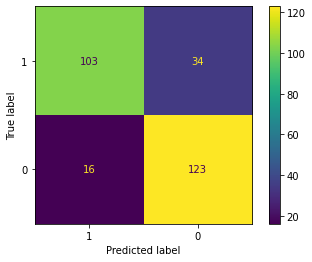

Classification Report of SVC:
               precision    recall  f1-score   support

           0       0.87      0.75      0.80       137
           1       0.78      0.88      0.83       139

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276

Accuracy of SVC: 0.8188405797101449


In [19]:
modelS = SVC()
modelS.fit(X_train, y_train)
predictionS = modelS.predict(X_test)
cmS= metrics.confusion_matrix(y_test, predictionS)
cm_disS = metrics.ConfusionMatrixDisplay(confusion_matrix=cmS, display_labels=df['treatment'].unique())
cm_disS.plot()
plt.show()
classS= metrics.classification_report(y_test, predictionS)
print('Classification Report of SVC:\n', classS)
scoreS= metrics.accuracy_score(y_test, predictionS)
print('Accuracy of SVC:', scoreS)

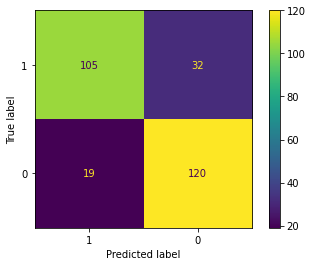

Classification Report of SVC Linear Kernel:
               precision    recall  f1-score   support

           0       0.85      0.77      0.80       137
           1       0.79      0.86      0.82       139

    accuracy                           0.82       276
   macro avg       0.82      0.81      0.81       276
weighted avg       0.82      0.82      0.81       276

Accuracy of SVC Linear Trick: 0.8152173913043478


In [20]:
modelSt = SVC(kernel='linear')
modelSt.fit(X_train, y_train)
predictionSt = modelSt.predict(X_test)
cmSt= metrics.confusion_matrix(y_test, predictionSt)
cm_disSt = metrics.ConfusionMatrixDisplay(confusion_matrix=cmSt, display_labels=df['treatment'].unique())
cm_disSt.plot()
plt.show()
classSt= metrics.classification_report(y_test, predictionSt)
print('Classification Report of SVC Linear Kernel:\n', classSt)
scoreSt= metrics.accuracy_score(y_test, predictionSt)
print('Accuracy of SVC Linear Trick:', scoreSt)

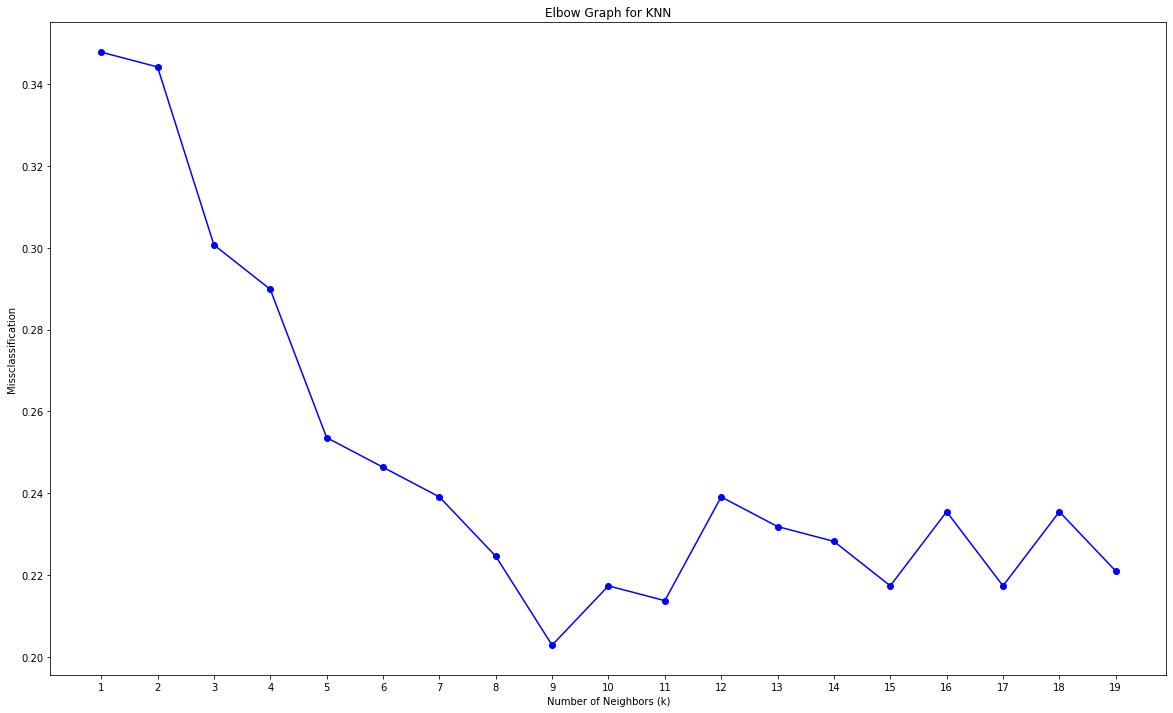

In [21]:
k_values = list(range(1, 20)) 
miss_scores = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    misclass=1-accuracy
    miss_scores.append(misclass)


plt.figure(figsize=(20, 12))
plt.plot(k_values, miss_scores, marker='o', linestyle='-', color='b')
plt.title('Elbow Graph for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Missclassification')
plt.xticks(k_values)
plt.show()

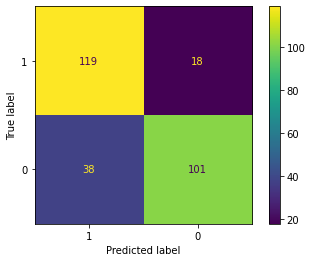

Classification Report of KNN:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       137
           1       0.85      0.73      0.78       139

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276

Accuracy of KNN: 0.7971014492753623


In [22]:
modelK = KNeighborsClassifier(n_neighbors=9)
modelK.fit(X_train, y_train)
predictionK = modelK.predict(X_test)
cmK= metrics.confusion_matrix(y_test, predictionK)
cm_disK = metrics.ConfusionMatrixDisplay(confusion_matrix=cmK, display_labels=df['treatment'].unique())
cm_disK.plot()
plt.show()
classK= metrics.classification_report(y_test, predictionK)
print('Classification Report of KNN:\n', classK)
scoreK= metrics.accuracy_score(y_test, predictionK)
print('Accuracy of KNN:', scoreK)

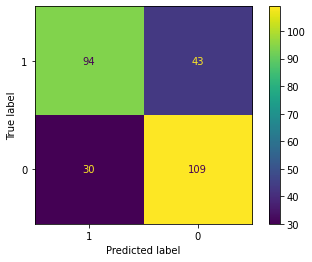

Classification Report of Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.76      0.69      0.72       137
           1       0.72      0.78      0.75       139

    accuracy                           0.74       276
   macro avg       0.74      0.74      0.73       276
weighted avg       0.74      0.74      0.73       276

Accuracy of Decision Tree Classifier: 0.7355072463768116


In [23]:
modelD = DecisionTreeClassifier()
modelD.fit(X_train, y_train)
predictionD = modelD.predict(X_test)
cmD= metrics.confusion_matrix(y_test, predictionD)
cm_disD = metrics.ConfusionMatrixDisplay(confusion_matrix=cmD, display_labels=df['treatment'].unique())
cm_disD.plot()
plt.show()
classD= metrics.classification_report(y_test, predictionD)
print('Classification Report of Decision Tree Classifier:\n', classD)
scoreD= metrics.accuracy_score(y_test, predictionD)
print('Accuracy of Decision Tree Classifier:', scoreD)

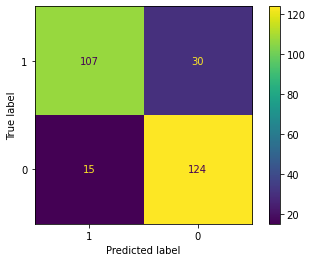

Classification Report of Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       137
           1       0.81      0.89      0.85       139

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276

Accuracy of Random Forest Classifier: 0.8369565217391305


In [24]:
modelR = RandomForestClassifier(n_estimators=300, random_state=43)
modelR.fit(X_train, y_train)
predictionR = modelR.predict(X_test)
cmR= metrics.confusion_matrix(y_test, predictionR)
cm_disR = metrics.ConfusionMatrixDisplay(confusion_matrix=cmR, display_labels=df['treatment'].unique())
cm_disR.plot()
plt.show()
classR= metrics.classification_report(y_test, predictionR)
print('Classification Report of Random Forest Classifier:\n', classR)
scoreR= metrics.accuracy_score(y_test, predictionR)
print('Accuracy of Random Forest Classifier:', scoreR)

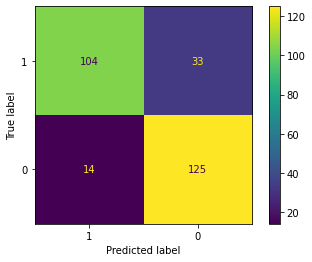

Classification Report of Bagging Classifier:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82       137
           1       0.79      0.90      0.84       139

    accuracy                           0.83       276
   macro avg       0.84      0.83      0.83       276
weighted avg       0.84      0.83      0.83       276

Accuracy of Bagging Classifier: 0.8297101449275363


In [25]:
bc = RandomForestClassifier()
modelB = BaggingClassifier(bc, n_estimators=10, random_state=42)
modelB.fit(X_train, y_train)
predictionB = modelB.predict(X_test)
cmB= metrics.confusion_matrix(y_test, predictionB)
cm_disgB = metrics.ConfusionMatrixDisplay(confusion_matrix=cmB, display_labels=df['treatment'].unique())
cm_disgB.plot()
plt.show()
classB= metrics.classification_report(y_test, predictionB)
print('Classification Report of Bagging Classifier:\n', classB)
scoreB= metrics.accuracy_score(y_test, predictionB)
print('Accuracy of Bagging Classifier:', scoreB)

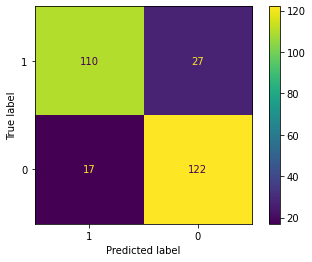

Classification Report of Gradient Boosting:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       137
           1       0.82      0.88      0.85       139

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276

Accuracy of Gradient Boosting: 0.8405797101449275


In [26]:
modelG = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
modelG.fit(X_train, y_train)
predictionG = modelG.predict(X_test)
cmG= metrics.confusion_matrix(y_test, predictionG)
cm_disG = metrics.ConfusionMatrixDisplay(confusion_matrix=cmG, display_labels=df['treatment'].unique())
cm_disG.plot()
plt.show()
classG= metrics.classification_report(y_test, predictionG)
print('Classification Report of Gradient Boosting:\n', classG)
scoreG= metrics.accuracy_score(y_test, predictionG)
print('Accuracy of Gradient Boosting:', scoreG)

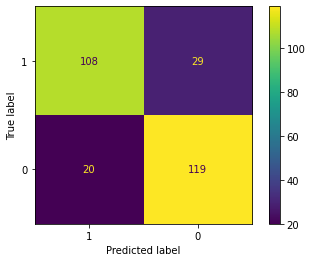

Classification Report of XG Boost:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82       137
           1       0.80      0.86      0.83       139

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276

Accuracy of XG Boost: 0.822463768115942


In [27]:
modelX = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
modelX.fit(X_train, y_train)
predictionX = modelX.predict(X_test)
cmX= metrics.confusion_matrix(y_test, predictionX)
cm_disgX = metrics.ConfusionMatrixDisplay(confusion_matrix=cmX, display_labels=df['treatment'].unique())
cm_disgX.plot()
plt.show()
classX= metrics.classification_report(y_test, predictionX)
print('Classification Report of XG Boost:\n', classX)
scoreX= metrics.accuracy_score(y_test, predictionX)
print('Accuracy of XG Boost:', scoreX)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='swish'))
model.add(Dense(32, activation='swish'))
model.add(Dense(64, activation='swish'))
model.add(Dense(32, activation='swish'))
model.add(Dense(16, activation='swish'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=50, validation_split=0.22)

Epoch 1/15
16/16 [==============================] - 2s 21ms/step - loss: 0.6821 - accuracy: 0.6171 - val_loss: 0.6610 - val_accuracy: 0.7163
Epoch 2/15
16/16 [==============================] - 0s 5ms/step - loss: 0.6383 - accuracy: 0.7395 - val_loss: 0.6189 - val_accuracy: 0.7070
Epoch 3/15
16/16 [==============================] - 0s 5ms/step - loss: 0.5723 - accuracy: 0.7447 - val_loss: 0.5858 - val_accuracy: 0.7163
Epoch 4/15
16/16 [==============================] - 0s 4ms/step - loss: 0.5130 - accuracy: 0.7724 - val_loss: 0.5828 - val_accuracy: 0.7163
Epoch 5/15
16/16 [==============================] - 0s 5ms/step - loss: 0.4749 - accuracy: 0.7816 - val_loss: 0.5726 - val_accuracy: 0.7209
Epoch 6/15
16/16 [==============================] - 0s 6ms/step - loss: 0.4489 - accuracy: 0.8079 - val_loss: 0.5699 - val_accuracy: 0.7395
Epoch 7/15
16/16 [==============================] - 0s 6ms/step - loss: 0.4340 - accuracy: 0.8105 - val_loss: 0.5588 - val_accuracy: 0.7395
Epoch 8/15
16/16 [=

In [29]:
loss, accuracy = model.evaluate(X_test, y_test)
scoreDL = accuracy
print("Accuracy of Deep Learning Model: ", scoreDL)

9/9 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.8188
Accuracy of Deep Learning Model:  0.8188405632972717


Text(0, 0.5, 'Accuracy')

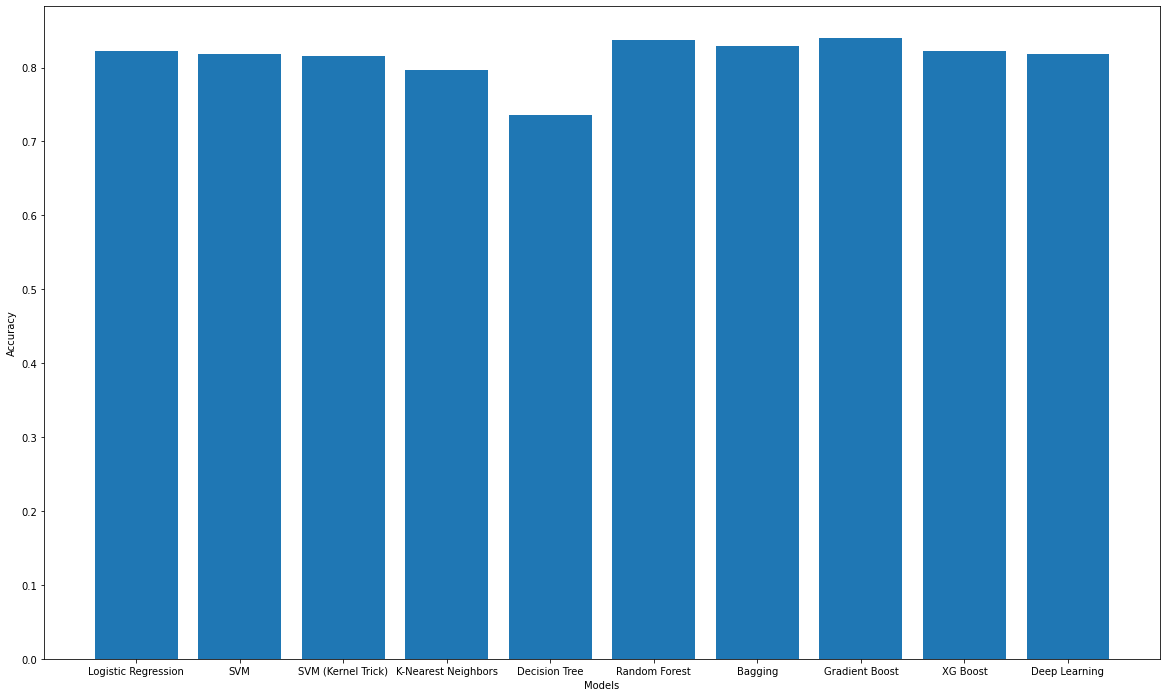

In [30]:
import numpy as np
X=['Logistic Regression', 'SVM', 'SVM (Kernel Trick)', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Bagging', 'Gradient Boost', 'XG Boost', 'Deep Learning']
accuracy_matrix=[scoreL, scoreS, scoreSt, scoreK, scoreD, scoreR, scoreB, scoreG, scoreX, scoreDL]
X_axis = np.arange(len(X)) 
plt.figure(figsize=(20, 12))
plt.bar(X_axis, accuracy_matrix, label = 'Accuracy Scores of Models') 
plt.xticks(X_axis, X) 
plt.xlabel("Models") 
plt.ylabel("Accuracy") 